c:\Users\CPN\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Số dòng: 5960
Số cột: 14

Tên các biến: ['REASON', 'JOB', 'BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'gDEBTINC']

Missing values theo từng biến:
          MissingCount  MissingPercent
DEBTINC           1267       21.258389
DEROG              708       11.879195
DELINQ             580        9.731544
MORTDUE            518        8.691275
YOJ                515        8.640940
NINQ               510        8.557047
CLAGE              308        5.167785
JOB                279        4.681208
REASON             252        4.228188
CLNO               222        3.724832
VALUE              112        1.879195
BAD                  0        0.000000
LOAN                 0        0.000000
gDEBTINC             0        0.000000

Tổng số dòng có ít nhất một giá trị thiếu: 2596 (43.56%)


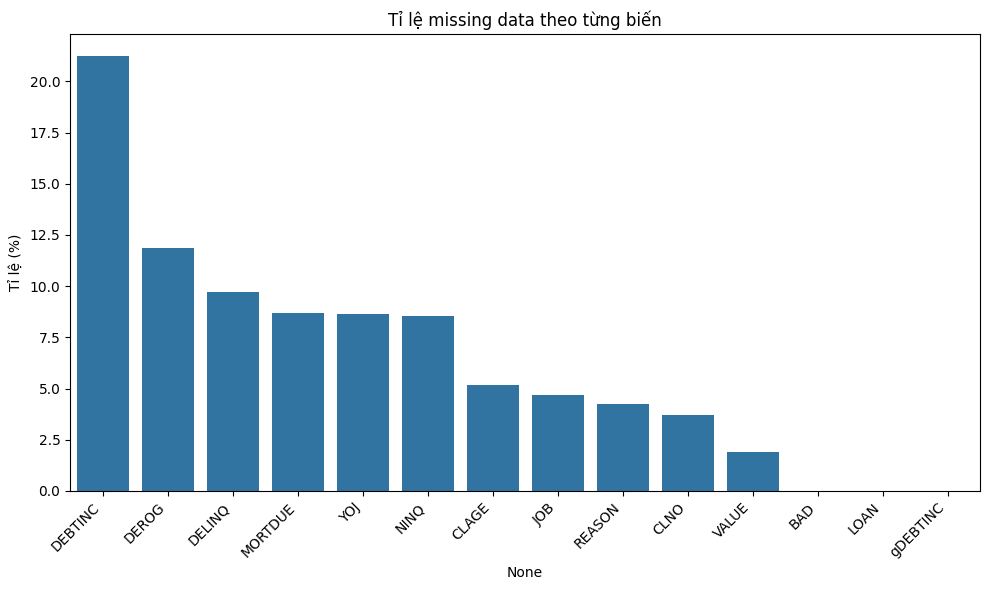

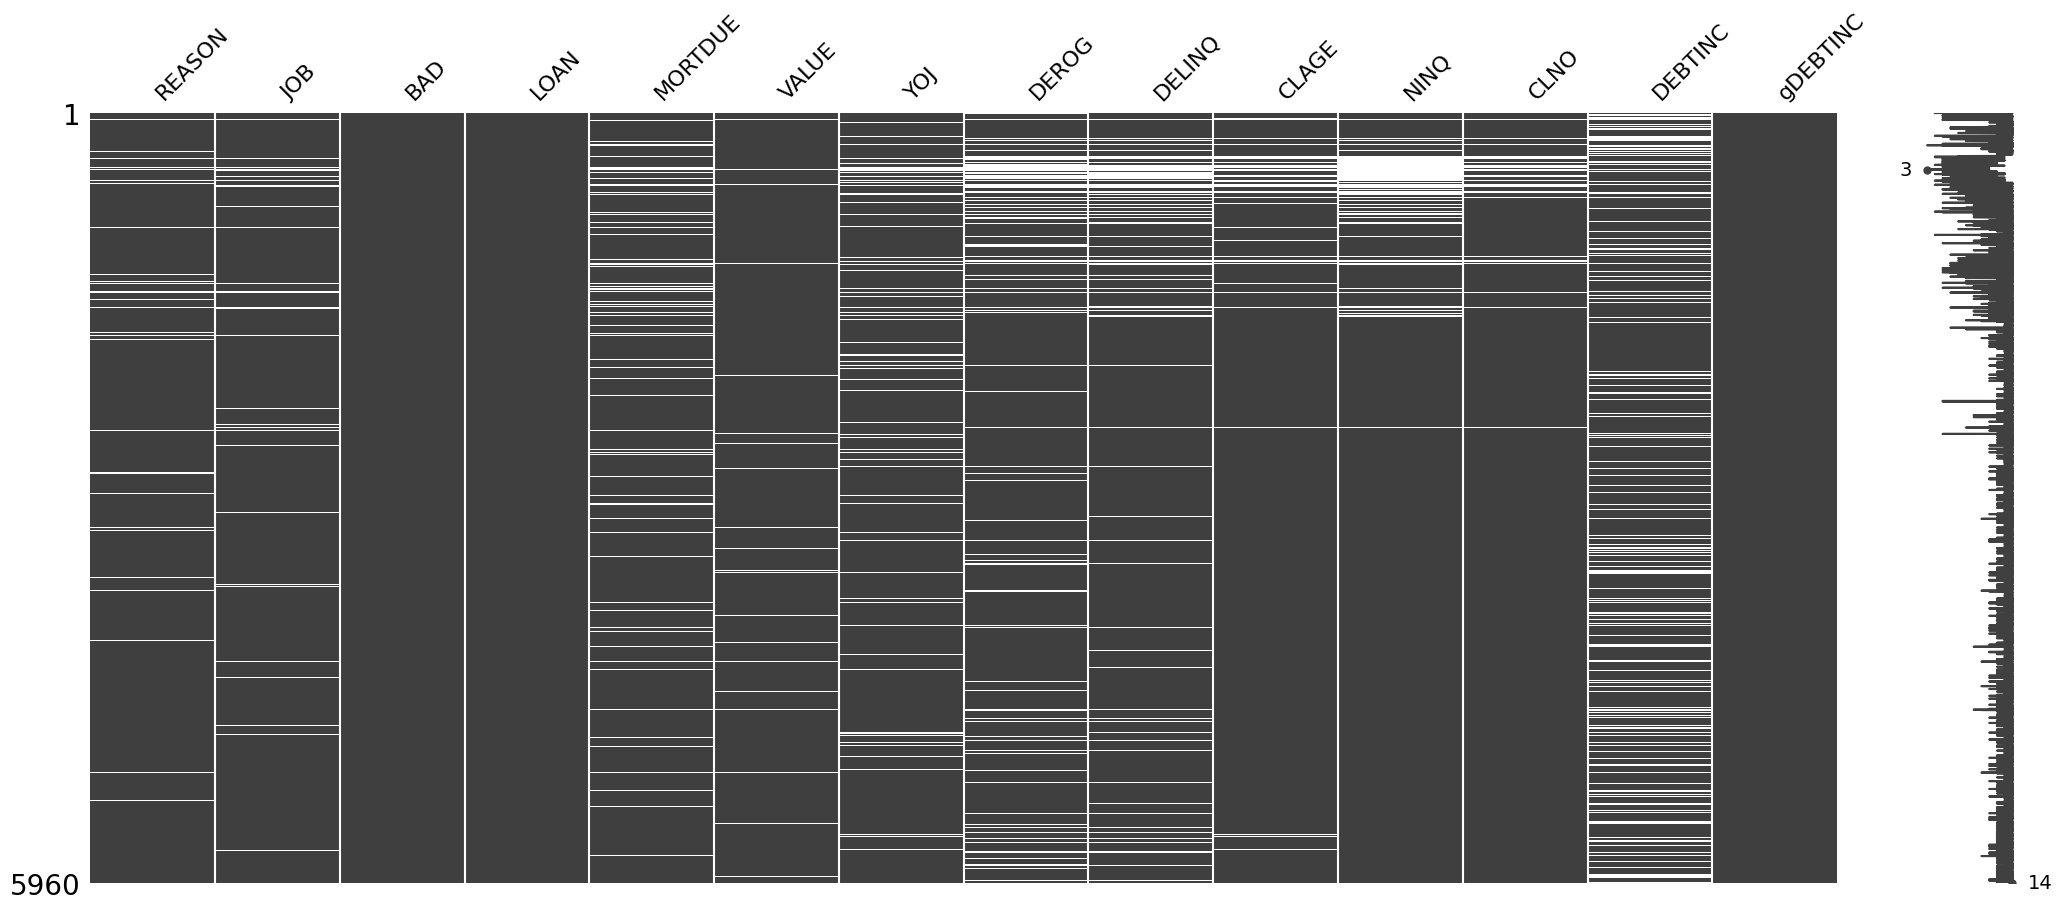

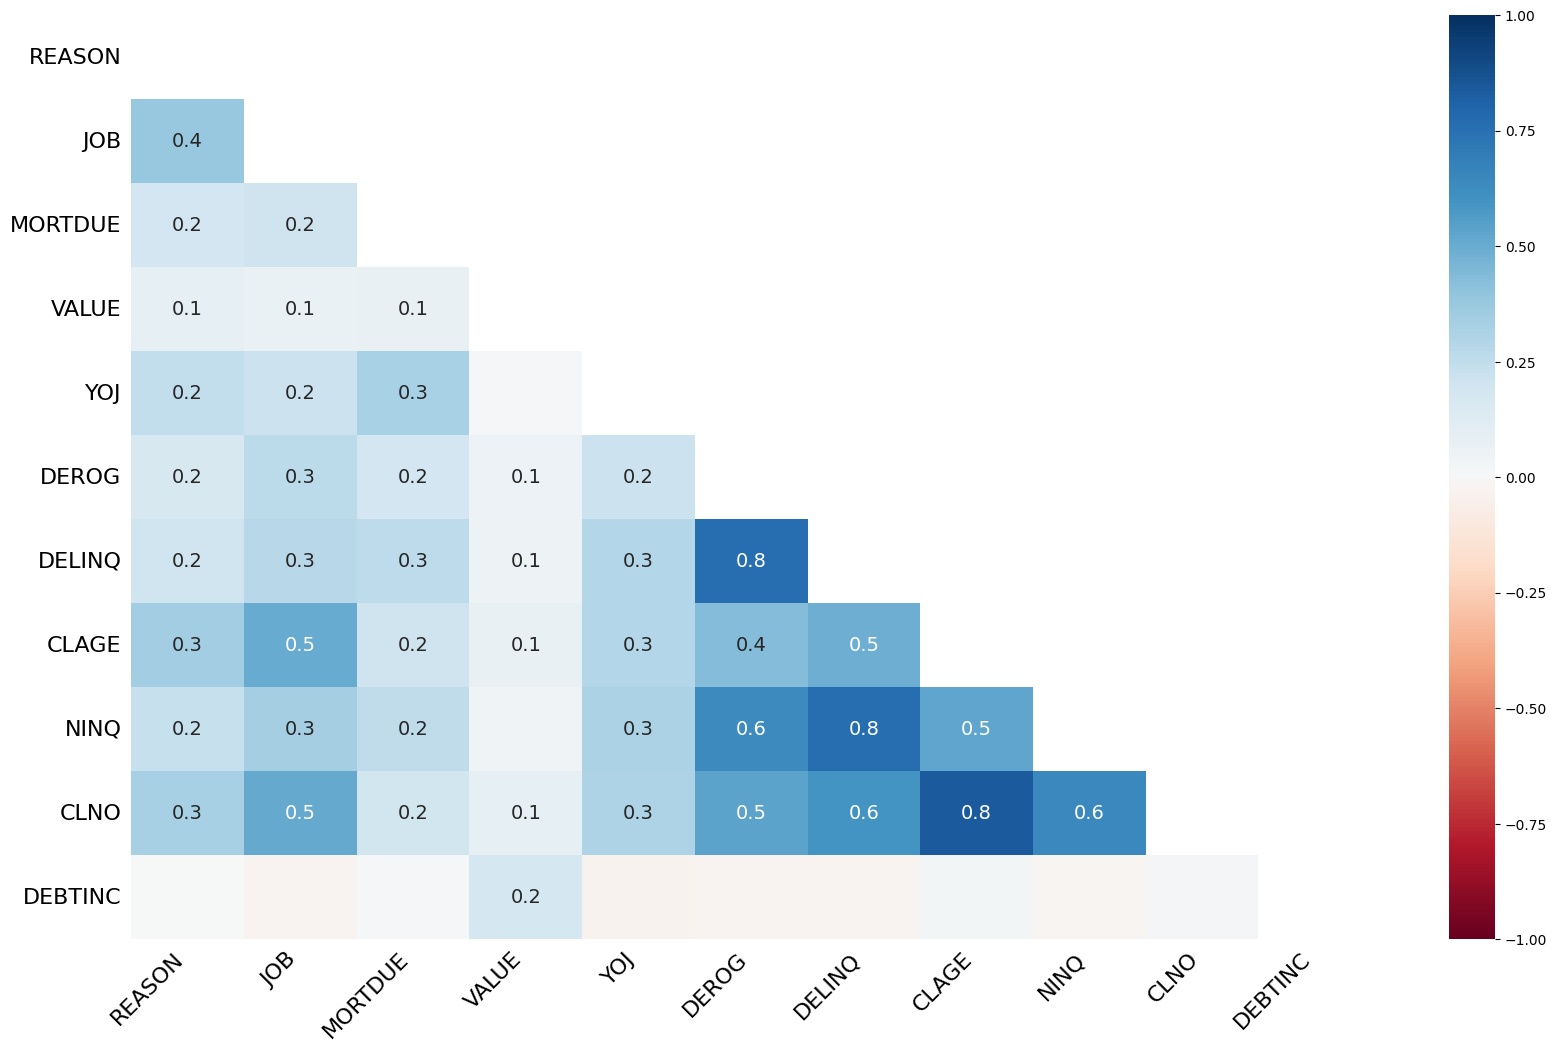

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# === 1. Load data từ file Excel ===
file_path = r'D:\Python\hmeq.xlsx'
data = pd.read_excel("D:/Python/hmeq.xlsx", sheet_name=0, engine="openpyxl") # Giả định sheet đầu tiên là dữ liệu

# === 2. Thông tin tổng quan về dữ liệu ===
print("Số dòng:", data.shape[0])
print("Số cột:", data.shape[1])
print("\nTên các biến:", data.columns.tolist())

# === 3. Thống kê missing data theo từng biến ===
missing_per_column = data.isnull().sum()
missing_percent = (missing_per_column / len(data)) * 100

missing_df = pd.DataFrame({
    'MissingCount': missing_per_column,
    'MissingPercent': missing_percent
}).sort_values(by='MissingCount', ascending=False)

print("\nMissing values theo từng biến:")
print(missing_df)

# === 4. Tổng số dòng có ít nhất 1 giá trị thiếu ===
rows_with_missing = data.isnull().any(axis=1).sum()
print(f"\nTổng số dòng có ít nhất một giá trị thiếu: {rows_with_missing} ({rows_with_missing / len(data) * 100:.2f}%)")

# === 5. Trực quan hóa missing data ===

# Biểu đồ dạng bar
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_df.index, y=missing_df['MissingPercent'])
plt.xticks(rotation=45, ha='right')
plt.title('Tỉ lệ missing data theo từng biến')
plt.ylabel('Tỉ lệ (%)')
plt.tight_layout()
plt.show()

# Biểu đồ matrix trực quan hóa missing pattern
msno.matrix(data)
plt.show()

# Heatmap correlation giữa missingness
msno.heatmap(data)
plt.show()


   Variable  MissingRate  BAD_if_missing (%)  BAD_if_not_missing (%)  \
10  DEBTINC     0.212584           62.036306                8.587258   
3     VALUE     0.018792           93.750000               18.536252   
5     DEROG     0.118792           12.288136               20.982483   
1       JOB     0.046812            8.243728               20.524556   
6    DELINQ     0.097315           12.413793               20.762082   
4       YOJ     0.086409           12.621359               20.642792   
8      NINQ     0.085570           14.705882               20.440367   
7     CLAGE     0.051678           25.324675               19.656759   
9      CLNO     0.037248           23.873874               19.797839   
0    REASON     0.042282           19.047619               19.989488   
2   MORTDUE     0.086913           20.463320               19.900772   

         p-value  
10  0.000000e+00  
3   1.242722e-85  
5   7.276489e-08  
1   8.023363e-07  
6   2.297274e-06  
4   1.737091e-05  
8 

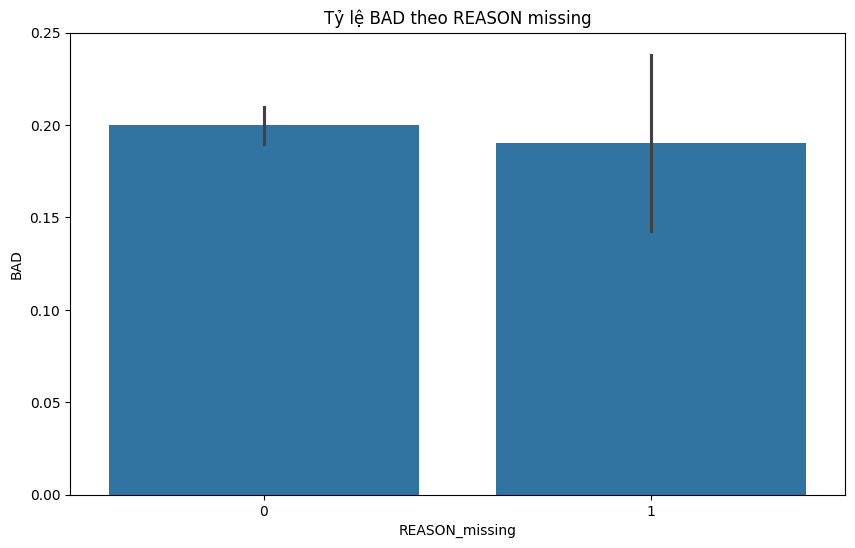

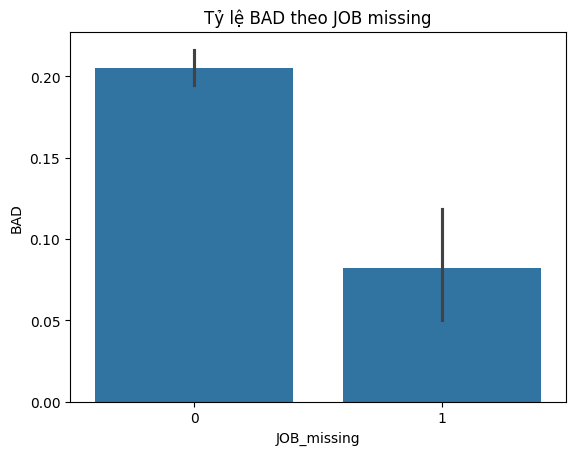

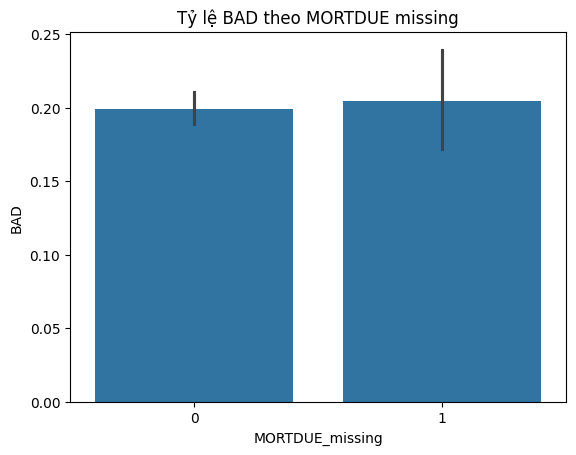

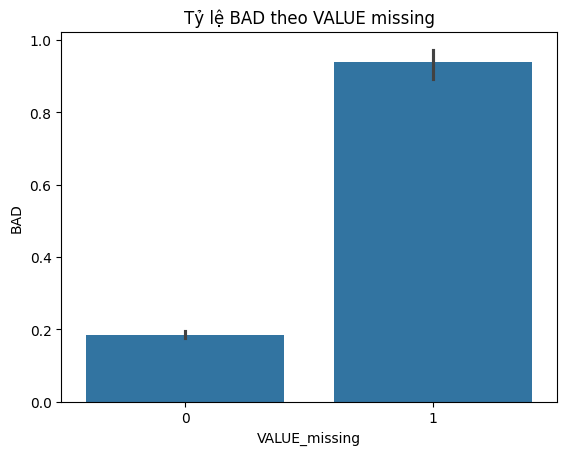

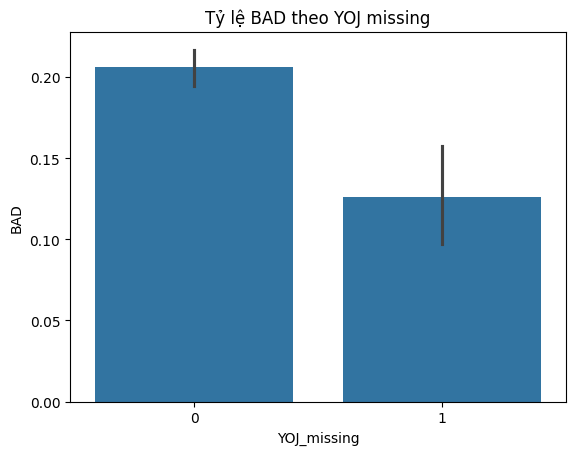

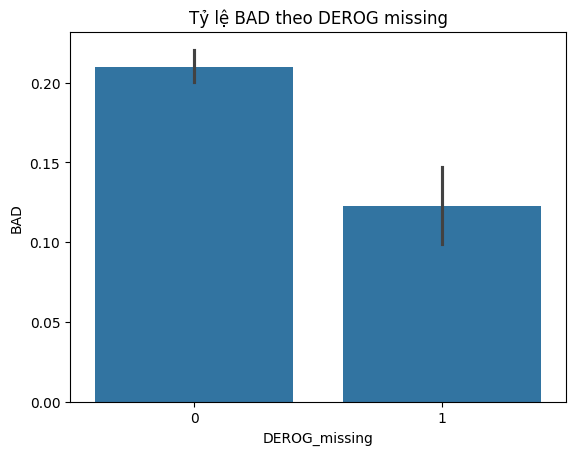

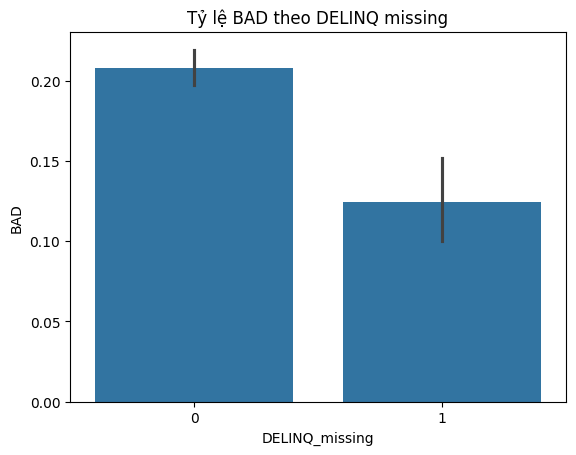

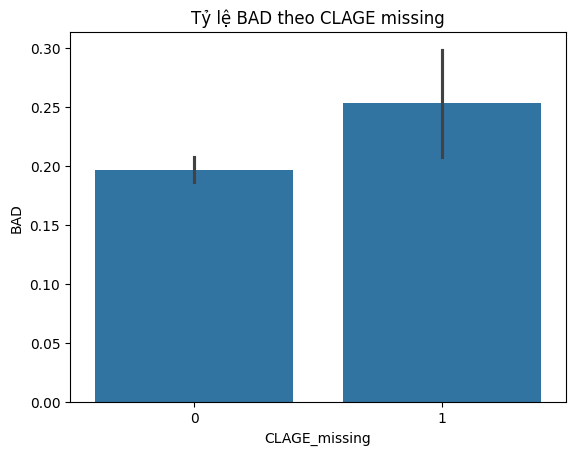

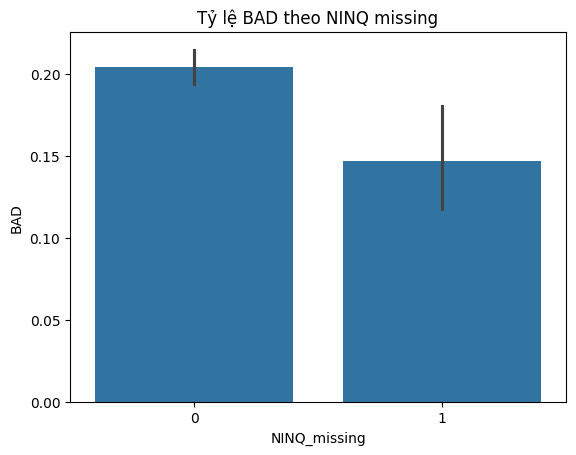

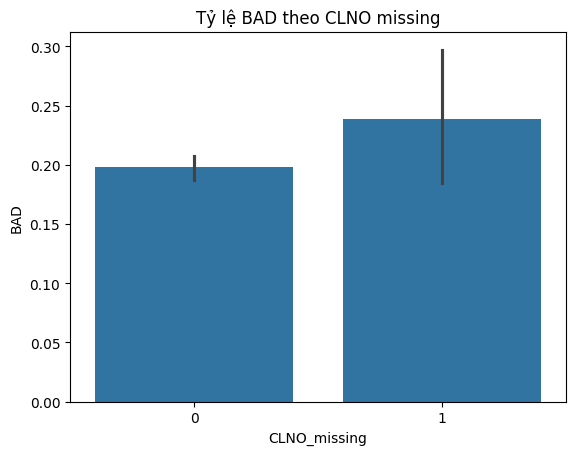

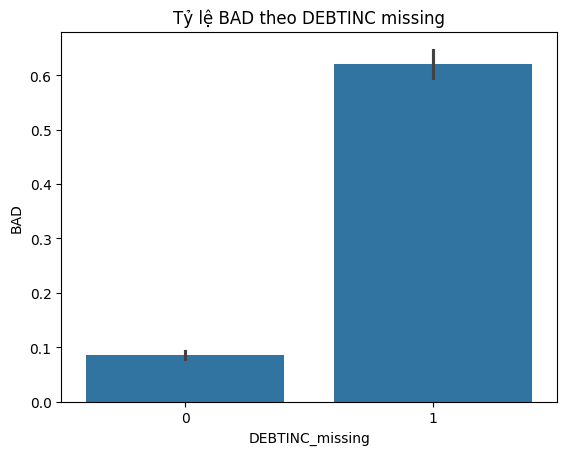

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Giả sử bạn đã có biến `data`
# Tạo danh sách các biến có missing
missing_cols = data.columns[data.isnull().any()].tolist()

# Khởi tạo bảng kết quả
results = []

for col in missing_cols:
    flag_col = col + "_missing"
    data[flag_col] = data[col].isnull().astype(int)

    # Tính tỷ lệ BAD theo flag
    cross_tab = pd.crosstab(data[flag_col], data['BAD'], normalize='index') * 100

    # Chi-squared test
    contingency = pd.crosstab(data[flag_col], data['BAD'])
    chi2, p, _, _ = chi2_contingency(contingency)

    results.append({
        'Variable': col,
        'MissingRate': data[flag_col].mean(),
        'BAD_if_missing (%)': cross_tab.loc[1, 1] if 1 in cross_tab.index else 0,
        'BAD_if_not_missing (%)': cross_tab.loc[0, 1] if 0 in cross_tab.index else 0,
        'p-value': p
    })

# Đưa ra kết quả
missing_analysis = pd.DataFrame(results).sort_values('p-value')
print(missing_analysis)

# Vẽ biểu đồ trực quan nếu muốn
plt.figure(figsize=(10, 6))
for var in missing_cols:
    sns.barplot(x=var + "_missing", y="BAD", data=data, estimator=lambda x: sum(x)/len(x))
    plt.title(f"Tỷ lệ BAD theo {var} missing")
    plt.show()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Drop biến không cần thiết
data = data.drop(columns=['gDEBTINC'])


Numeric variables: ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
Categorical variables: ['REASON', 'JOB', 'BAD']


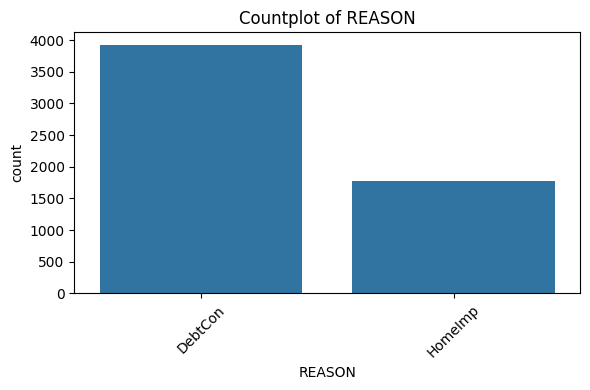

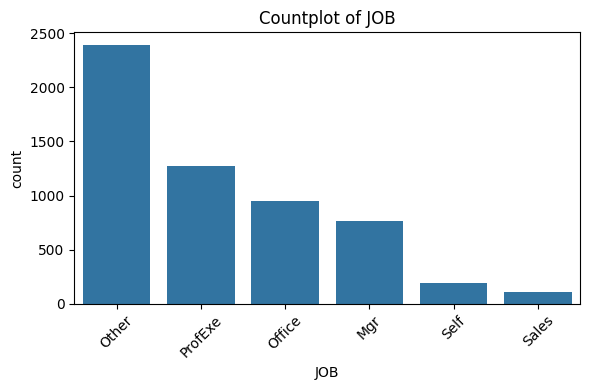

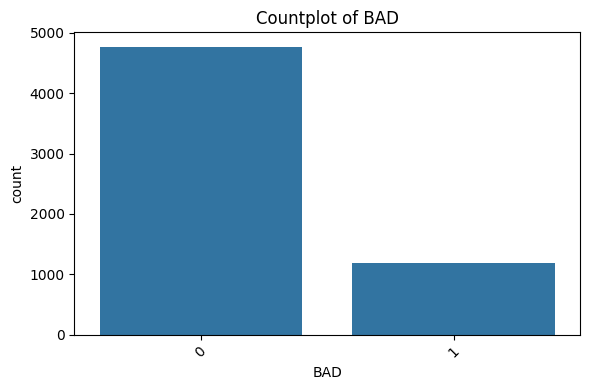

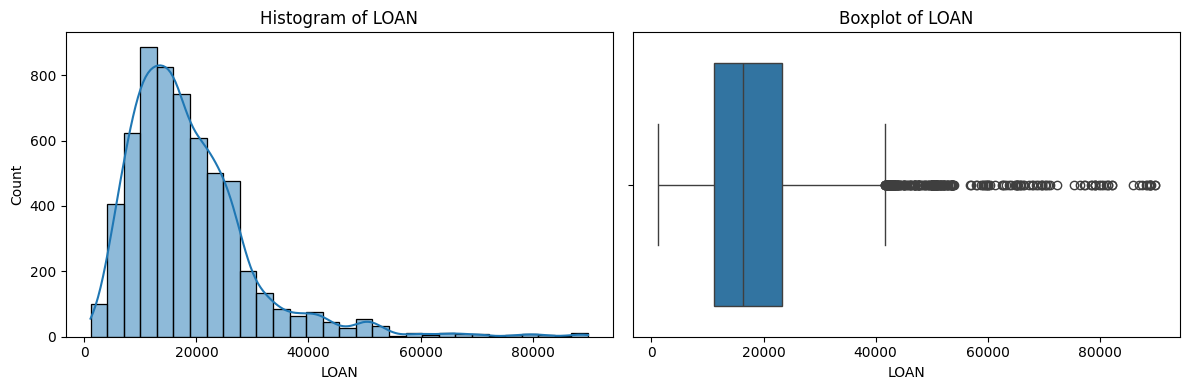

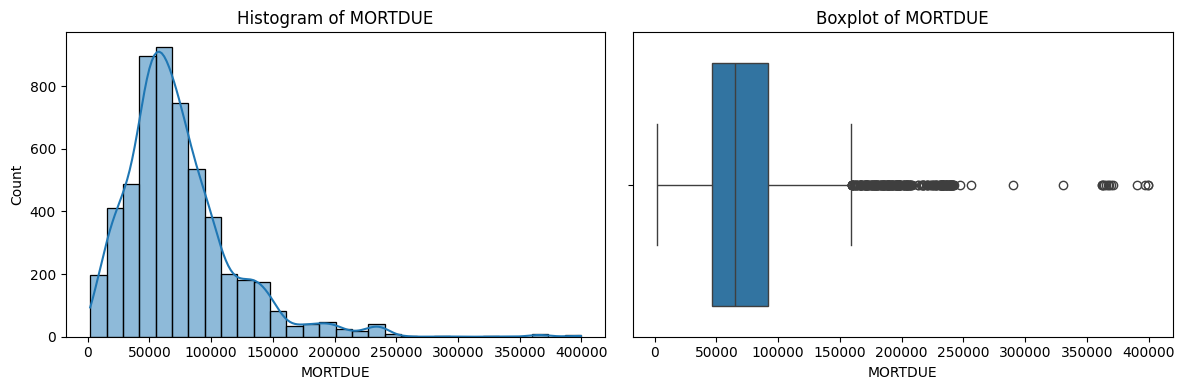

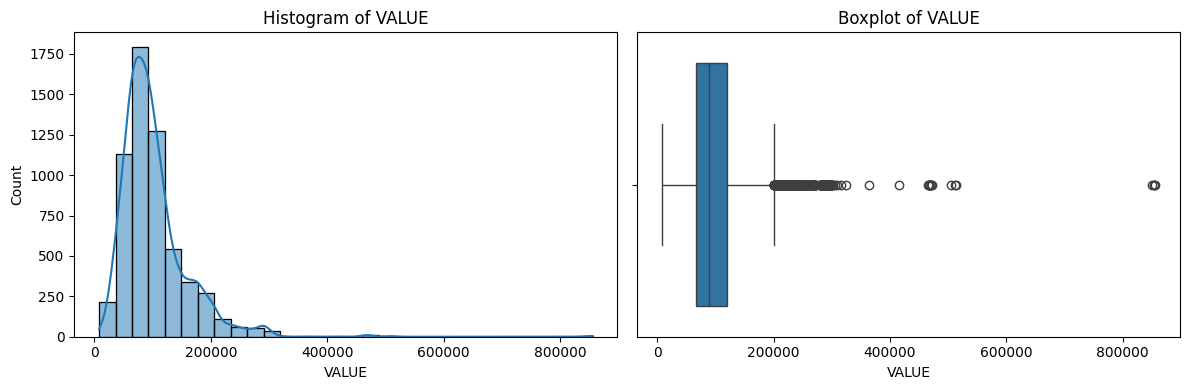

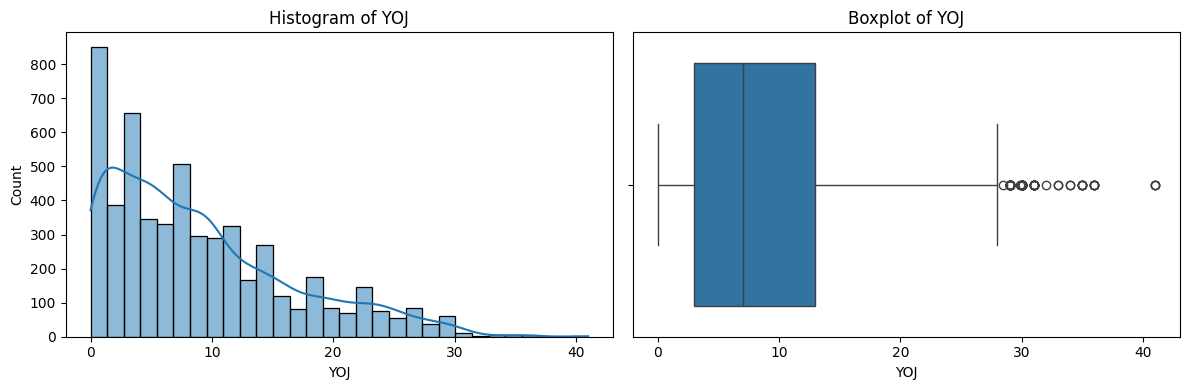

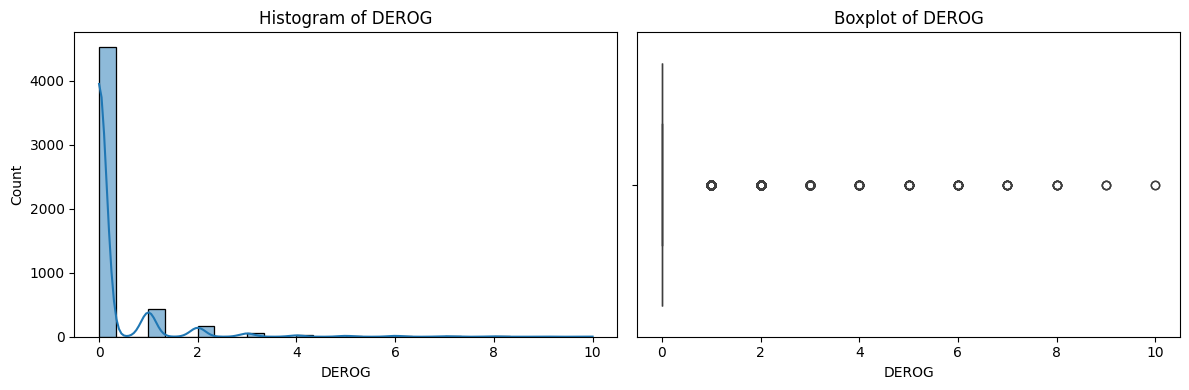

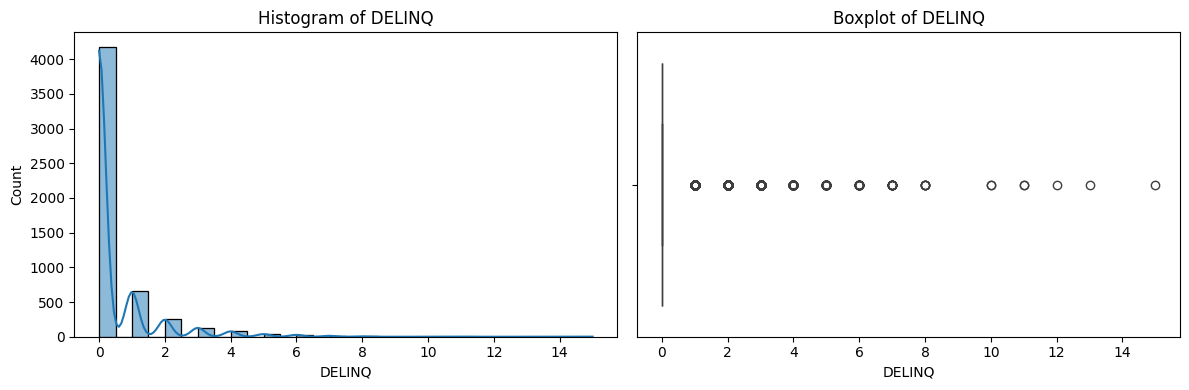

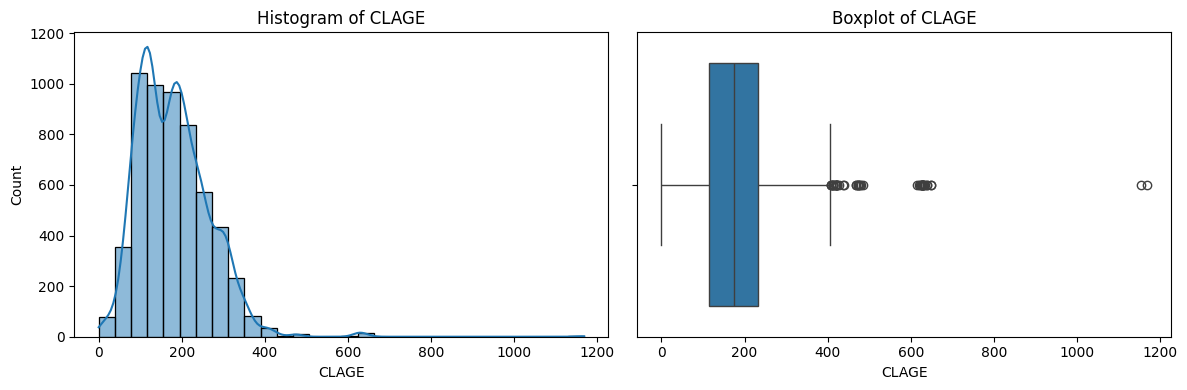

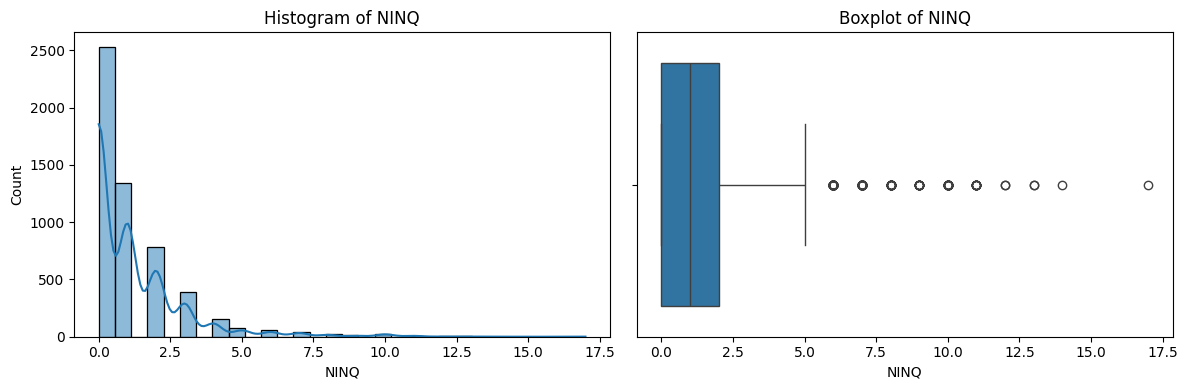

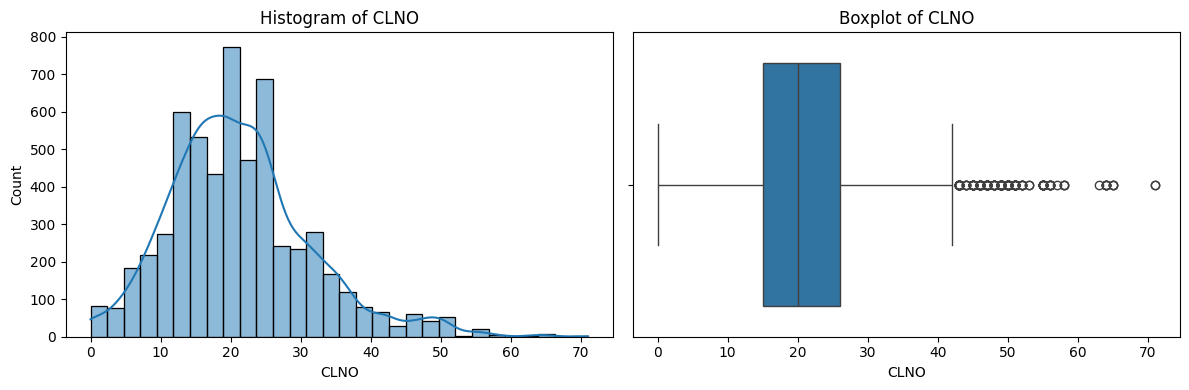

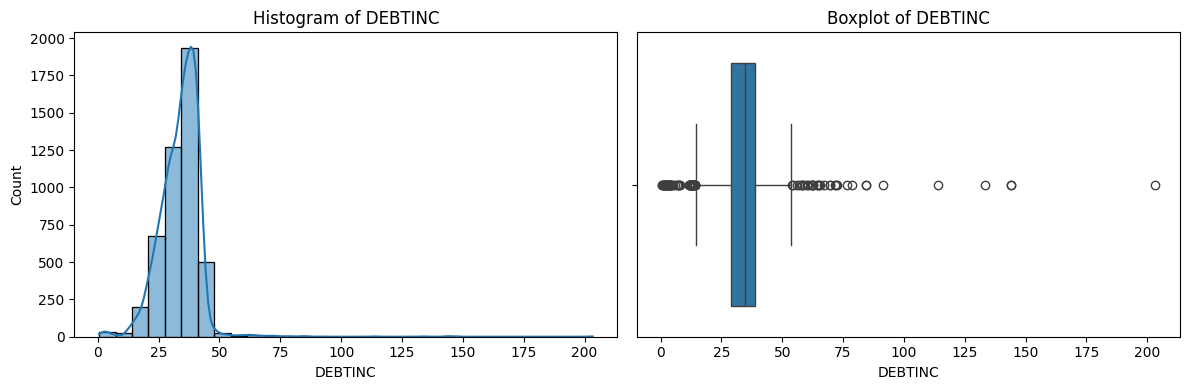

In [4]:

# Phân loại biến
binary_vars = ['BAD']
categorical_vars = data.select_dtypes(include=['object']).columns.tolist() + binary_vars
numeric_vars = [col for col in data.select_dtypes(include=['int64', 'float64']).columns if col not in binary_vars]

print("Numeric variables:", numeric_vars)
print("Categorical variables:", categorical_vars)

# Vẽ biểu đồ biến phân loại
for col in categorical_vars:
    plt.figure(figsize=(6,4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Vẽ histogram và boxplot cho biến số
for col in numeric_vars:
    plt.figure(figsize=(12,4))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(data[col].dropna(), bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()


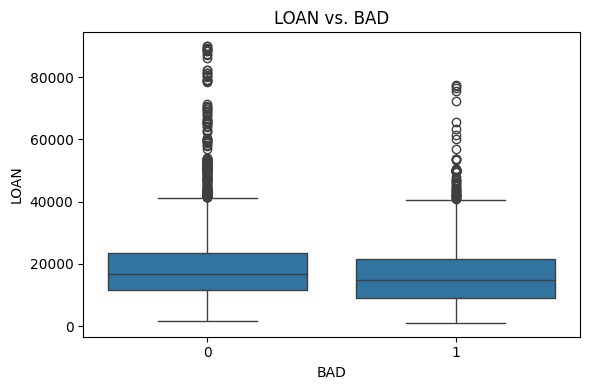

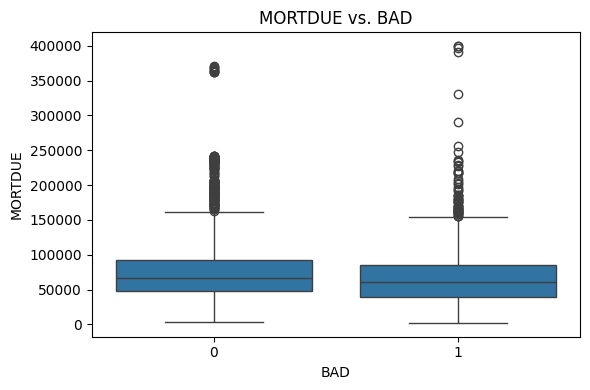

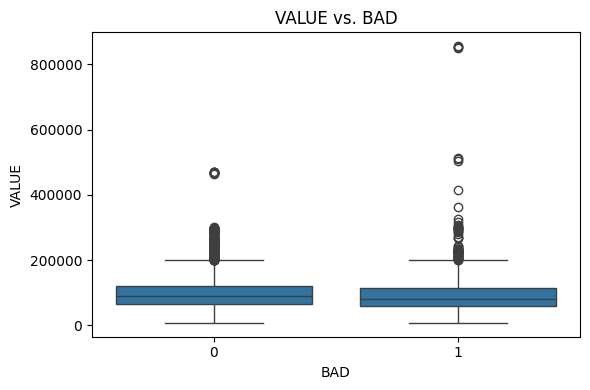

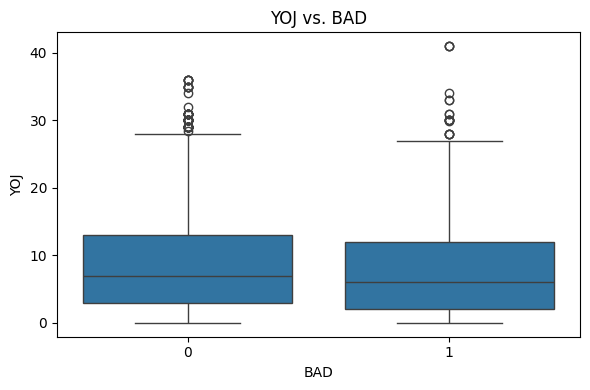

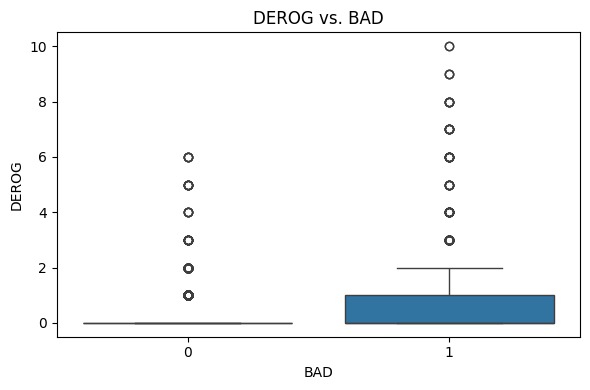

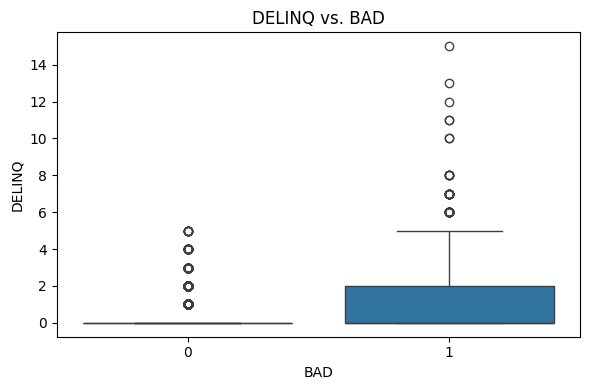

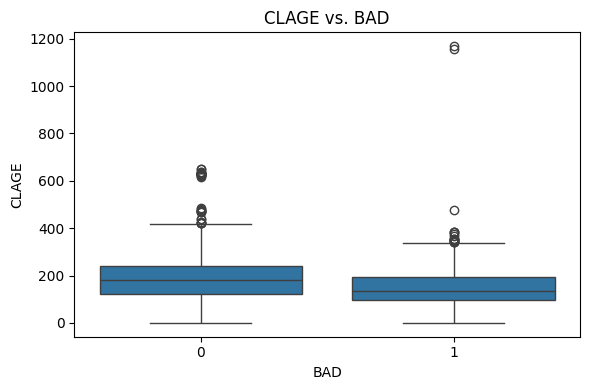

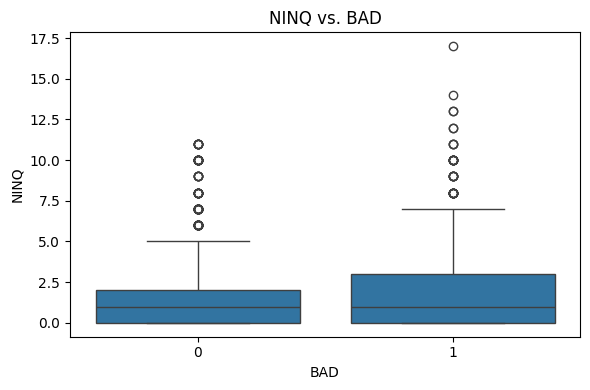

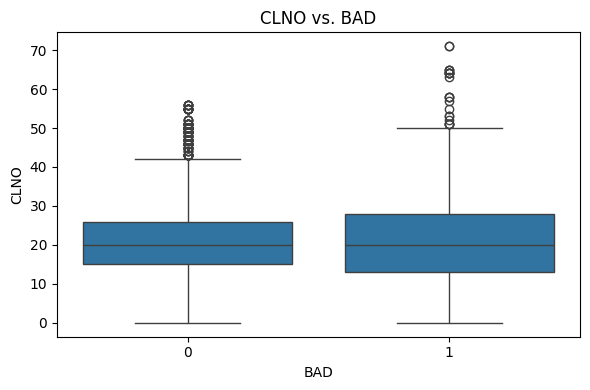

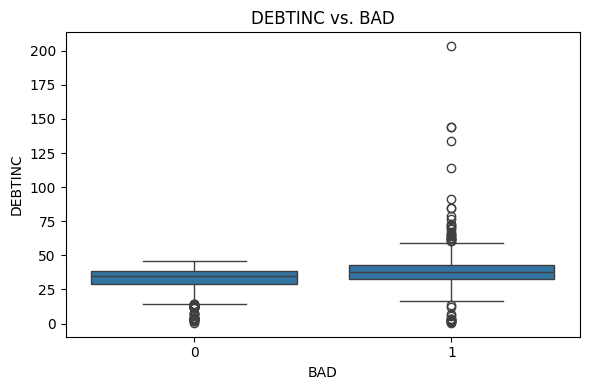

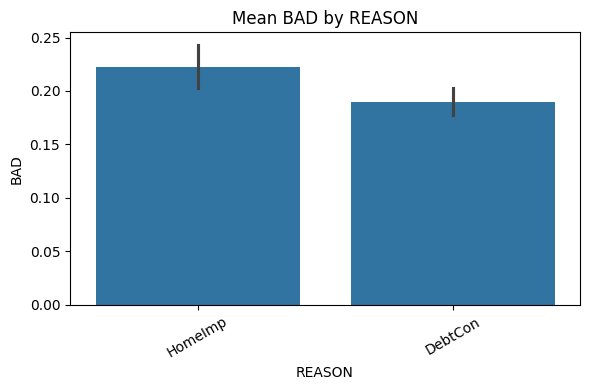

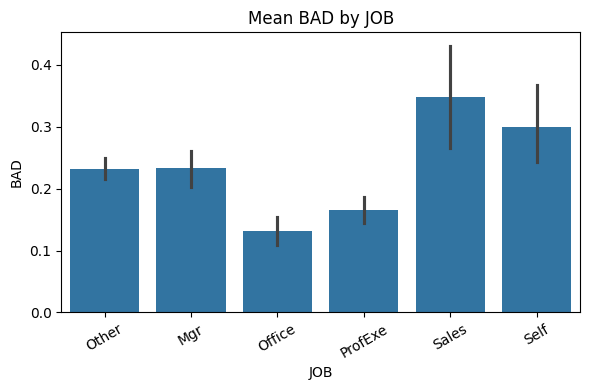

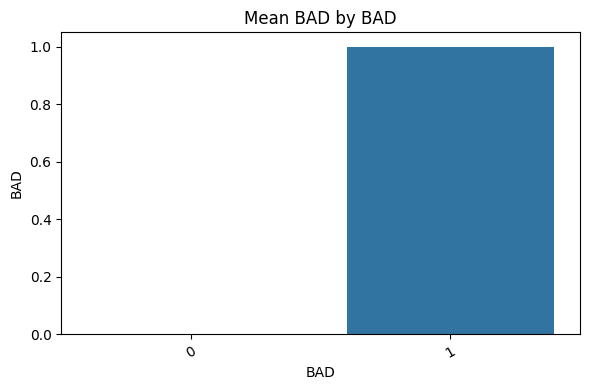

In [5]:
target_var = 'BAD'
# === 1. Bivariate plots: Numeric vs. Target (Boxplot) ===
for var in numeric_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x=target_var, y=var)
    plt.title(f"{var} vs. {target_var}")
    plt.tight_layout()
    plt.show()

# === 2. Bivariate plots: Categorical vs. Target (Barplot) ===
for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.barplot(data=data, x=var, y=target_var, estimator=lambda x: sum(x)/len(x))
    plt.title(f"Mean {target_var} by {var}")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

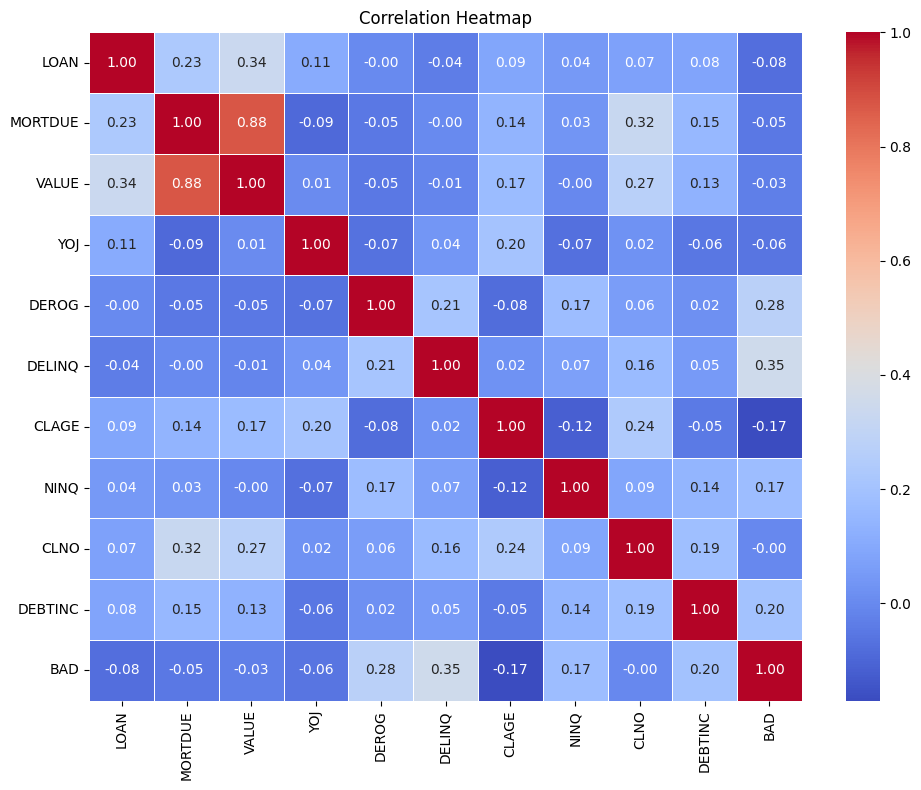

In [6]:
# Tính ma trận tương quan
corr_matrix = data[numeric_vars + [target_var]].corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [8]:
data.drop(columns=['MORTDUE'], inplace=True)

In [9]:
from sklearn.model_selection import train_test_split
# Chia train-test stratified theo BAD
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42, stratify=data["BAD"])

In [59]:
data

,REASON,JOB,BAD,LOAN,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,...,JOB_missing,MORTDUE_missing,VALUE_missing,YOJ_missing,DEROG_missing,DELINQ_missing,CLAGE_missing,NINQ_missing,CLNO_missing,DEBTINC_missing
0,NaN,NaN,0,4400,60250.0,NaN,NaN,NaN,NaN,NaN,...,1,1,0,1,1,1,1,1,1,1
1,HomeImp,Other,1,2300,46200.0,3.0,0.0,1.0,122.266667,1.0,...,0,0,0,0,0,0,0,0,0,1
2,DebtCon,NaN,0,5400,64505.0,5.0,NaN,0.0,69.542430,NaN,...,1,0,0,0,1,0,0,1,0,0
3,HomeImp,Mgr,0,3600,76484.0,9.0,NaN,2.0,202.510775,0.0,...,0,0,0,0,1,0,0,0,0,0
4,HomeImp,Office,0,3800,63459.0,20.0,0.0,0.0,203.751534,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,DebtCon,Other,0,7100,33580.0,1.0,0.0,0.0,29.856365,9.0,...,0,0,0,0,0,0,0,0,0,0
5956,DebtCon,Other,1,15000,81000.0,5.3,8.0,0.0,259.733333,4.0,...,0,0,0,0,0,0,0,0,0,1
5957,DebtCon,ProfExe,0,12000,175065.0,7.0,NaN,1.0,206.666667,4.0,...,0,0,0,0,1,0,0,0,0,1
5958,DebtCon,Mgr,0,22400,95734.0,5.0,0.0,0.0,75.955735,7.0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Hàm binning theo BAD rate (và gán bin "Missing")
def bin_variable_with_missing(df, var, target='BAD', bins=5):
    temp = df[[var, target]].copy()

    # Bỏ missing tạm thời để phân bin
    non_missing = temp[temp[var].notnull()]
    non_missing['bin'] = pd.qcut(non_missing[var], q=bins, duplicates='drop')

    # Gán bin vào full dataframe
    full_bin = pd.cut(df[var], bins=non_missing['bin'].cat.categories, include_lowest=True)
    full_bin = full_bin.astype("category")
    full_bin = full_bin.cat.add_categories("Missing")
    full_bin = full_bin.fillna("Missing")

    return full_bin



In [28]:
# Danh sách các biến numeric bạn muốn bin (trừ biến target BAD và gDEBTINC)
vars_to_bin = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ',
               'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

for var in vars_to_bin:
    train_df[var + '_bin'] = bin_variable_with_missing(train_df, var, target='BAD', bins=5)




C:\Users\CPN\AppData\Local\Temp\ipykernel_9300\3447423138.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_missing['bin'] = pd.qcut(non_missing[var], q=bins, duplicates='drop')
C:\Users\CPN\AppData\Local\Temp\ipykernel_9300\3447423138.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_missing['bin'] = pd.qcut(non_missing[var], q=bins, duplicates='drop')
C:\Users\CPN\AppData\Local\Temp\ipykernel_9300\3447423138.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [29]:
for var in vars_to_bin:
    print(f"\n--- {var} ---")
    print(train_df.groupby(var + '_bin')['BAD'].agg(['count', 'mean']))




--- LOAN ---
                     count      mean
LOAN_bin                            
(1099.999, 10000.0]    981  0.294597
(10000.0, 14300.0]     941  0.195537
(14300.0, 18800.0]     942  0.176221
(18800.0, 25000.0]     963  0.168224
(25000.0, 89900.0]     941  0.159405
Missing                  0       NaN

--- MORTDUE ---
                     count      mean
MORTDUE_bin                         
(2062.999, 41532.8]    872  0.258028
(41532.8, 57830.4]     872  0.198394
(57830.4, 73855.6]     872  0.205275
(73855.6, 99141.6]     872  0.152523
(99141.6, 397299.0]    872  0.183486
Missing                408  0.198529

--- VALUE ---
                      count      mean
VALUE_bin                            
(7999.999, 61125.0]     938  0.256930
(61125.0, 79864.2]      938  0.180171
(79864.2, 99400.0]      938  0.170576
(99400.0, 131629.0]     937  0.141942
(131629.0, 855909.0]    938  0.184435
Missing                  79  0.949367

--- YOJ ---
               count      mean
YOJ_bin       

C:\Users\CPN\AppData\Local\Temp\ipykernel_9300\2671820261.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train_df.groupby(var + '_bin')['BAD'].agg(['count', 'mean']))
C:\Users\CPN\AppData\Local\Temp\ipykernel_9300\2671820261.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train_df.groupby(var + '_bin')['BAD'].agg(['count', 'mean']))
C:\Users\CPN\AppData\Local\Temp\ipykernel_9300\2671820261.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the f

In [30]:
# Xóa biến gốc và bin tương ứng trong cả train và test
train_df.drop(columns=['MORTDUE', 'MORTDUE_bin'], inplace=True)
test_df.drop(columns=['MORTDUE'], inplace=True)  # test_df chưa cần binning


In [33]:
# Lưu cutpoints cho từng biến đã được bin
binning_cutpoints = {}

for var in vars_to_bin:  # Danh sách các biến đã được bin trong train_df
    if f"{var}_bin" in train_df.columns:
        # Loại bỏ các bin chứa từ "missing", giữ lại phần còn lại để suy ra cutpoints
        try:
            bins = train_df[f"{var}_bin"].cat.categories
        except AttributeError:
            # Nếu là string, convert ngược lại thành interval nếu có thể
            bins = pd.Series(train_df[f"{var}_bin"]).dropna().unique()
        
        cut_list = []
        for b in bins:
            if 'missing' in str(b).lower():
                continue
            interval = str(b).replace('(', '').replace(']', '')
            left, right = interval.split(',')
            cut_list.append(float(left.strip()))
            cut_list.append(float(right.strip()))
        cut_list = sorted(set(cut_list))
        if cut_list:
            binning_cutpoints[var] = cut_list


In [34]:
for var, cutpoints in binning_cutpoints.items():
    # Đặt giá trị đặc biệt cho missing trước khi bin
    temp = test_df[var].copy()
    temp_filled = temp.fillna(-999999)  # giá trị thấp để dễ phân biệt

    # Áp dụng binning
    test_df[f"{var}_bin"] = pd.cut(
        temp_filled,
        bins=[-float('inf')] + cutpoints + [float('inf')],
        include_lowest=True
    ).astype(str)

    # Gán lại label "missing" cho các giá trị ban đầu là NA
    test_df.loc[temp.isna(), f"{var}_bin"] = 'missing'


In [35]:
for var in binning_cutpoints.keys():
    print(f"{var}_bin:")
    print(test_df[f"{var}_bin"].value_counts(dropna=False))
    print()


LOAN_bin:
LOAN_bin
(14300.0, 18800.0]     260
(18800.0, 25000.0]     241
(10000.0, 14300.0]     231
(1099.999, 10000.0]    230
(25000.0, 89900.0]     230
Name: count, dtype: int64

VALUE_bin:
VALUE_bin
(79864.2, 99400.0]      244
(131629.0, 855909.0]    241
(61125.0, 79864.2]      239
(7999.999, 61125.0]     218
(99400.0, 131629.0]     217
missing                  33
Name: count, dtype: int64

YOJ_bin:
YOJ_bin
(-0.001, 2.0]    242
(5.0, 9.0]       215
(2.0, 5.0]       215
(9.0, 15.0]      213
(15.0, 41.0]     198
missing          109
Name: count, dtype: int64

DEROG_bin:
DEROG_bin
(-0.001, 10.0]    1060
missing            132
Name: count, dtype: int64

DELINQ_bin:
DELINQ_bin
(-0.001, 1.0]    979
(1.0, 15.0]      107
missing          106
Name: count, dtype: int64

CLAGE_bin:
CLAGE_bin
(-0.001, 106.385]      236
(193.395, 247.558]     230
(145.343, 193.395]     225
(106.385, 145.343]     223
(247.558, 1168.234]    220
missing                 58
Name: count, dtype: int64

NINQ_bin:
NINQ_b

In [42]:
def calc_woe_iv(df, feature, target='BAD'):
    """
    Tính WOE và IV cho 1 biến (bin hoặc categorical).
    Xử lý missing như một nhóm riêng biệt.
    """
    df_temp = df[[feature, target]].copy()
    df_temp[feature] = df_temp[feature].astype(object).fillna("missing")

    grouped = df_temp.groupby(feature)[target].agg(
        bad='sum',
        total='count'
    ).reset_index()
    grouped['good'] = grouped['total'] - grouped['bad']

    total_bad = grouped['bad'].sum()
    total_good = grouped['good'].sum()

    grouped['dist_bad'] = grouped['bad'] / total_bad
    grouped['dist_good'] = grouped['good'] / total_good

    grouped['WOE'] = np.log((grouped['dist_good'] + 1e-6) / (grouped['dist_bad'] + 1e-6))
    grouped['IV'] = (grouped['dist_good'] - grouped['dist_bad']) * grouped['WOE']

    grouped['variable'] = feature
    total_iv = grouped['IV'].sum()

    return grouped[['variable', feature, 'bad', 'good', 'WOE', 'IV']], total_iv


In [40]:
woe_iv_summary = []
woe_dict = {}

for col in train_df.columns:
    if col.endswith('_bin'):
        woe_df, iv = calc_woe_iv(train_df, col, target='BAD')
        woe_iv_summary.append({'variable': col, 'IV': iv})
        woe_dict[col] = woe_df  # lưu chi tiết theo bin

# DataFrame tổng IV
iv_summary_df = pd.DataFrame(woe_iv_summary).sort_values(by='IV', ascending=False)

print(iv_summary_df)


      variable        IV
5  DEBTINC_bin  1.841520
7   DELINQ_bin  0.426084
1    VALUE_bin  0.399960
3    CLAGE_bin  0.226166
8     NINQ_bin  0.118304
0     LOAN_bin  0.089580
2      YOJ_bin  0.063321
6    DEROG_bin  0.033113
4     CLNO_bin  0.031684


C:\Users\CPN\AppData\Local\Temp\ipykernel_9300\2960159810.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_temp[feature] = df_temp[feature].astype(object).fillna("missing")


In [41]:
categorical_vars = ['REASON', 'JOB']  # Bạn có thể cập nhật danh sách này

for col in categorical_vars:
    woe_df, iv = calc_woe_iv(train_df, col, target='BAD')
    print(f"WOE table for {col}:\n", woe_df)
    print(f"IV for {col}: {iv:.4f}\n")

    woe_dict[col] = woe_df  # lưu lại để encode sau
    iv_summary_df = pd.concat([iv_summary_df, pd.DataFrame([{'variable': col, 'IV': iv}])], ignore_index=True)


WOE table for REASON:
   variable   REASON  bad  good       WOE        IV
0   REASON  DebtCon  606  2556  0.049613  0.001608
1   REASON  HomeImp  311  1105 -0.121898  0.004575
2   REASON  missing   34   156  0.133786  0.000685
IV for REASON: 0.0069

WOE table for JOB:
   variable      JOB  bad  good       WOE        IV
0      JOB      Mgr  145   479 -0.194738  0.005254
1      JOB   Office  109   637  0.375713  0.019638
2      JOB    Other  451  1476 -0.204082  0.017867
3      JOB  ProfExe  156   847  0.302137  0.017483
4      JOB    Sales   30    62 -0.663739  0.010157
5      JOB     Self   44   114 -0.437685  0.007178
6      JOB  missing   16   202  1.145932  0.041364
IV for JOB: 0.1189



In [46]:
woe_dict = {}
iv_summary_df = pd.DataFrame(columns=['variable', 'IV'])

# Các biến đã được bin (continuous)
binned_vars = [col for col in train_df.columns if col.endswith('_bin')]

# Các biến phân loại gốc
categorical_vars = ['REASON', 'JOB']

for col in binned_vars + categorical_vars:
    woe_table, iv = calc_woe_iv(train_df, col, target='BAD')
    
    print(f"--- WOE table for {col} ---")
    print(woe_table)
    print(f"IV for {col}: {iv:.4f}\n")
    
    woe_dict[col] = woe_table
    iv_summary_df = pd.concat([iv_summary_df, pd.DataFrame([{'variable': col, 'IV': iv}])], ignore_index=True)


C:\Users\CPN\AppData\Local\Temp\ipykernel_9300\3034201543.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_temp[feature] = df_temp[feature].astype(object).fillna("missing")
C:\Users\CPN\AppData\Local\Temp\ipykernel_9300\2318800353.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  iv_summary_df = pd.concat([iv_summary_df, pd.DataFrame([{'variable': col, 'IV': iv}])], ignore_index=True)


--- WOE table for LOAN_bin ---
   variable             LOAN_bin  bad  good       WOE        IV
0  LOAN_bin  (1099.999, 10000.0]  289   692 -0.516544  0.063327
1  LOAN_bin   (10000.0, 14300.0]  184   757  0.024721  0.000120
2  LOAN_bin   (14300.0, 18800.0]  166   776  0.152458  0.004383
3  LOAN_bin   (18800.0, 25000.0]  162   801  0.208558  0.008239
4  LOAN_bin   (25000.0, 89900.0]  150   791  0.272955  0.013512
IV for LOAN_bin: 0.0896

--- WOE table for VALUE_bin ---
    variable             VALUE_bin  bad  good       WOE        IV
0  VALUE_bin   (7999.999, 61125.0]  241   697 -0.327716  0.023207
1  VALUE_bin    (61125.0, 79864.2]  169   769  0.125486  0.002981
2  VALUE_bin    (79864.2, 99400.0]  160   778  0.191846  0.006826
3  VALUE_bin   (99400.0, 131629.0]  133   804  0.409542  0.028989
4  VALUE_bin  (131629.0, 855909.0]  173   765  0.096878  0.001793
5  VALUE_bin               Missing   75     4 -4.319959  0.336164
IV for VALUE_bin: 0.4000

--- WOE table for YOJ_bin ---
  variable

In [51]:
woe_maps = {}

for var in binning_cutpoints.keys():
    bin_var = var + '_bin'
    woe_df, iv = calc_woe_iv(train_df, bin_var, target='BAD')
    print(f"{var} - IV: {iv:.4f}")
    
    # Tạo dictionary: {bin_label: WOE_value}
    woe_map = dict(zip(woe_df[bin_var], woe_df['WOE']))
    woe_maps[bin_var] = woe_map

    # Gán WOE vào train và test
    train_df[var + '_woe'] = train_df[bin_var].map(woe_map)
    test_df[var + '_woe'] = test_df[bin_var].map(woe_map)


C:\Users\CPN\AppData\Local\Temp\ipykernel_9300\3034201543.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_temp[feature] = df_temp[feature].astype(object).fillna("missing")


LOAN - IV: 0.0896
VALUE - IV: 0.4000
YOJ - IV: 0.0633
DEROG - IV: 0.0331
DELINQ - IV: 0.4261
CLAGE - IV: 0.2262
NINQ - IV: 0.1183
CLNO - IV: 0.0317
DEBTINC - IV: 1.8415


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Biến đầu vào là các biến WOE
woe_features = [var + '_woe' for var in binning_cutpoints.keys() if var != 'MORTDUE']  # bạn đã drop MORTDUE

# Huấn luyện
X_train = train_df[woe_features]
y_train = train_df['BAD']

X_test = test_df[woe_features]
y_test = test_df['BAD']

model = LogisticRegression()
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Đánh giá
print(classification_report(y_test, y_pred))
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [12]:
numerical_vars = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
categorical_vars = ['REASON', 'JOB']
# target_var = 'BAD'

In [15]:
from optbinning import OptimalBinning

In [19]:
# --- Hàm calc_woe_iv ---
def calc_woe_iv(df, feature, target):
    """
    Tính toán Weight of Evidence (WOE) và Information Value (IV) cho một biến đã bin.
    Xử lý các trường hợp đếm Good/Bad bằng 0 trong một bin.
    """
    # Đảm bảo dữ liệu đầu vào không có NaN trong cột feature hoặc target
    temp_df = df[[feature, target]].dropna()

    df_woe_iv = temp_df.groupby(feature)[target].agg(
        total_count=('count'),
        bad_count=('sum'),
        good_count=(lambda x: (x == 0).sum()) # Giả định BAD=1 (default), GOOD=0 (non-default)
    ).reset_index()

    total_good = df_woe_iv['good_count'].sum()
    total_bad = df_woe_iv['bad_count'].sum()

    # Sử dụng epsilon nhỏ để tránh chia cho 0 hoặc log(0)
    epsilon = 0.000001

    df_woe_iv['percent_good'] = df_woe_iv['good_count'] / (total_good + epsilon)
    df_woe_iv['percent_bad'] = df_woe_iv['bad_count'] / (total_bad + epsilon)

    # Tính WOE và IV
    df_woe_iv['WOE'] = np.log(df_woe_iv['percent_good'] / (df_woe_iv['percent_bad'] + epsilon))
    df_woe_iv['IV'] = (df_woe_iv['percent_good'] - df_woe_iv['percent_bad']) * df_woe_iv['WOE']

    total_iv = df_woe_iv['IV'].sum()

    return df_woe_iv, total_iv

# --- Bắt đầu quá trình Binning và WOE ---
print("--- Bắt đầu quá trình Binning và WOE ---")

binning_transformers = {} # Lưu trữ các transformer của optbinning
woe_maps = {} # Lưu trữ ánh xạ WOE (bin_label: WOE_value)
overall_total_iv = 0

all_features_for_woe = [] # Danh sách các biến đã được xử lý và sẽ được chuyển thành WOE

# 1. Binning các biến Numerical sử dụng OptimalBinning
print("\nBinning các biến Numerical:")
for var in numerical_vars:
    # Kiểm tra xem biến có tồn tại trong train_df không
    if var not in train_df.columns:
        print(f"  Cảnh báo: Biến numerical '{var}' không tồn tại trong tập huấn luyện. Bỏ qua binning.")
        continue
    
    # Kiểm tra nếu cột target_var có NaN trong tập huấn luyện
    if train_df[target_var].isnull().any():
        print(f"  LỖI: Cột mục tiêu '{target_var}' có NaN trong train_df. Vui lòng xử lý trước khi binning. Bỏ qua biến '{var}'.")
        continue

    print(f"  Đang binning '{var}'...")
    
    # Đã loại bỏ 'target=target_var' từ constructor
    optb = OptimalBinning(name=var, 
                          dtype="numerical", # dtype của biến
                          missing_treatment="special", # Xử lý missing values như một bin riêng
                          missing_replacement='Missing', # Nhãn cho bin missing values
                          # Các tham số khác của OptimalBinning có thể thêm vào đây
                          # Ví dụ: min_n_bins=3, max_n_bins=10, min_bin_size=0.05
                          )
    
    # Fit optbinning trên tập huấn luyện (target vẫn được truyền ở đây)
    optb.fit(train_df[var], train_df[target_var])
    
    # Transform tập train và test
    # optbinning tự động tạo các nhãn cho bin (ví dụ: "[0, 10)", "[10, 20)", "Missing")
    train_df[var + '_bin'] = optb.transform(train_df[var], metric_special="bins")
    test_df[var + '_bin'] = optb.transform(test_df[var], metric_special="bins")
    
    binning_transformers[var] = optb # Lưu transformer
    all_features_for_woe.append(var)

# 2. Tạo các cột '_bin' cho biến Categorical và xử lý NaNs
print("\nBinning các biến Categorical (chuyển đổi thành _bin và xử lý Missing):")
for var in categorical_vars:
    # Kiểm tra xem biến có tồn tại trong train_df không
    if var not in train_df.columns:
        print(f"  Cảnh báo: Biến categorical '{var}' không tồn tại trong tập huấn luyện. Bỏ qua binning.")
        continue

    print(f"  Đang xử lý '{var}'...")
    # Điền NaN với chuỗi 'Missing' cho biến categorical, sau đó chuyển sang str để đảm bảo đồng nhất type
    train_df[var + '_bin'] = train_df[var].astype(str).fillna('Missing')
    test_df[var + '_bin'] = test_df[var].astype(str).fillna('Missing')
    all_features_for_woe.append(var)

# --- Tính toán WOE và IV cho tất cả các biến đã bin ---
print("\nTính toán WOE và IV cho tất cả các biến đã bin:")
overall_total_iv = 0

for var in all_features_for_woe:
    bin_col = var + '_bin'
    
    # Kiểm tra xem cột _bin có tồn tại không trong DataFrame hiện tại
    if bin_col not in train_df.columns:
        print(f"  Cảnh báo: Cột '{bin_col}' không tìm thấy trong train_df (có thể do biến gốc không tồn tại hoặc lỗi binning). Bỏ qua tính WOE cho '{var}'.")
        continue

    woe_df, iv = calc_woe_iv(train_df, bin_col, target_var)
    woe_maps[bin_col] = dict(zip(woe_df[bin_col], woe_df['WOE']))
    
    print(f"  {var} - IV: {iv:.4f}")
    overall_total_iv += iv
    
    # Gán WOE vào train và test
    train_df[var + '_woe'] = train_df[bin_col].map(woe_maps[bin_col])
    test_df[var + '_woe'] = test_df[bin_col].map(woe_maps[bin_col])
    
    # Xử lý NaN sau khi map (có thể do bin mới xuất hiện trong test set mà không có trong train)
    # Điền 0 (WOE trung lập, log(1)) cho các giá trị NaN này.
    if train_df[var + '_woe'].isnull().sum() > 0:
        print(f"    Cảnh báo: Có {train_df[var + '_woe'].isnull().sum()} NaN trong train_df['{var + '_woe'}']. Đã điền 0.")
        train_df[var + '_woe'].fillna(0, inplace=True)
    if test_df[var + '_woe'].isnull().sum() > 0:
        print(f"    Cảnh báo: Có {test_df[var + '_woe'].isnull().sum()} NaN trong test_df['{var + '_woe'}']. Đã điền 0.")
        test_df[var + '_woe'].fillna(0, inplace=True)

print(f"\nTổng Information Value (IV) của tất cả các biến: {overall_total_iv:.4f}")

# --- Chuẩn bị dữ liệu cho Logistic Regression ---
print("\n--- Huấn luyện Logistic Regression và Đánh giá ---")

# Biến đầu vào là các biến WOE đã chuyển đổi
# Loại bỏ MORTDUE_woe như yêu cầu
woe_features_for_model = [f"{var}_woe" for var in all_features_for_woe if var != 'MORTDUE']

# Kiểm tra xem tất cả các cột WOE cần thiết có tồn tại không trước khi tạo X_train/X_test
missing_woe_cols_train = [col for col in woe_features_for_model if col not in train_df.columns]
missing_woe_cols_test = [col for col in woe_features_for_model if col not in test_df.columns]

if missing_woe_cols_train or missing_woe_cols_test:
    print(f"LỖI NGHIÊM TRỌNG: Các cột WOE sau không tìm thấy trong train_df: {missing_woe_cols_train}")
    print(f"LỖI NGHIÊM TRỌNG: Các cột WOE sau không tìm thấy trong test_df: {missing_woe_cols_test}")
    print("Vui lòng kiểm tra lại quá trình binning và tạo cột WOE.")
else:
    X_train = train_df[woe_features_for_model]
    y_train = train_df[target_var]

    X_test = test_df[woe_features_for_model]
    y_test = test_df[target_var]

    # Huấn luyện mô hình Logistic Regression
    model = LogisticRegression(solver='liblinear', random_state=42) # liblinear tốt cho tập nhỏ và regularization
    model.fit(X_train, y_train)

    # Dự đoán và đánh giá trên tập test
    y_pred_proba = model.predict_proba(X_test)[:, 1] # Xác suất của lớp 1 (BAD)
    y_pred = model.predict(X_test) # Dự đoán lớp (0 hoặc 1)

    print("\nĐánh giá mô hình trên tập Test:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

    # --- Tính Scorecard ---
    print("\n--- Tính Scorecard ---")

    # Lấy intercept và coefficients từ mô hình Logistic Regression
    intercept = model.intercept_[0]
    coefficients = model.coef_[0]

    # Ánh xạ coefficients với tên biến WOE
    feature_coefficients = dict(zip(woe_features_for_model, coefficients))

    # Định nghĩa các tham số Scorecard tiêu chuẩn (có thể điều chỉnh sau)
    base_score = 600 # Điểm cơ sở mong muốn
    pdo = 20 # Points to Double the Odds: Số điểm mà khi odds tăng gấp đôi, điểm tăng/giảm X
    factor = pdo / np.log(2) # Hệ số chuyển đổi log-odds sang điểm

    # Tính toán log_odds cho tập huấn luyện và kiểm tra
    # model.decision_function trả về log-odds (intercept + sum(beta * X))
    train_df['log_odds'] = model.decision_function(X_train)
    test_df['log_odds'] = model.decision_function(X_test)

    # Tính P0 (Offset) để điểm trung bình trên tập train khớp với Base Score
    # Score = P0 - (Factor * log_odds)
    # => P0 = Base_Score + (Factor * avg_log_odds_train)
    avg_log_odds_train = train_df['log_odds'].mean()
    P0 = base_score + (factor * avg_log_odds_train)

    # Áp dụng công thức tính Scorecard cho từng quan sát
    train_df['Score'] = P0 - (factor * train_df['log_odds'])
    test_df['Score'] = P0 - (factor * test_df['log_odds'])

    print(f"\nScorecard được tính với Điểm cơ sở = {base_score}, PDO = {pdo} điểm.")
    print("\nThống kê điểm trên tập huấn luyện:")
    print(train_df['Score'].describe())

    print("\nThống kê điểm trên tập kiểm tra:")
    print(test_df['Score'].describe())

    # Hiển thị vài điểm mẫu trên tập kiểm tra kèm biến BAD
    print("\nVí dụ điểm trên tập kiểm tra (5 hàng đầu, kèm trạng thái BAD):")
    print(test_df[['BAD', 'Score']].head())

    # In ra hệ số và điểm quy đổi cho mỗi biến WOE
    print("\n--- Phân tích đóng góp điểm của các biến ---")
    print(f"Điểm cơ sở (Base Score): {base_score}")
    print(f"Hệ số PDO (Points to Double the Odds): {pdo}")
    print(f"Hệ số Factor (Factor = PDO / log(2)): {factor:.4f}")

    print("\nĐiểm đóng góp của các biến (thay đổi điểm khi WOE tăng 1 đơn vị):")
    for feature, coef in feature_coefficients.items():
        points_per_woe_unit = coef * (-factor)
        print(f"  {feature}: {points_per_woe_unit:.4f} điểm / đơn vị WOE")

    # Điểm riêng của intercept (offset của mô hình)
    # Đây là điểm mà mô hình dự đoán nếu tất cả các WOE = 0
    intercept_score_contribution = P0 - (factor * intercept)
    print(f"  Điểm đóng góp từ Intercept (Offset ban đầu): {intercept_score_contribution:.4f}")


    # --- Trực quan hóa và đánh giá bổ sung ---
    print("\n--- Trực quan hóa kết quả ---")

    # Phân phối điểm trên tập kiểm tra (Good vs Bad)
    plt.figure(figsize=(12, 6))
    sns.histplot(test_df.loc[test_df['BAD'] == 0, 'Score'], color='green', label='Khách hàng Tốt (BAD=0)', kde=True, stat='density', alpha=0.6)
    sns.histplot(test_df.loc[test_df['BAD'] == 1, 'Score'], color='red', label='Khách hàng Xấu (BAD=1)', kde=True, stat='density', alpha=0.6)
    plt.axvline(base_score, color='blue', linestyle='--', label=f'Điểm Cơ Sở ({base_score})')
    plt.title('Phân phối Điểm Scorecard trên Tập Kiểm Tra')
    plt.xlabel('Điểm Scorecard')
    plt.ylabel('Mật độ')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Không Mặc Định (0)', 'Mặc Định (1)'],
                yticklabels=['Không Mặc Định (0)', 'Mặc Định (1)'])
    plt.title('Ma trận nhầm lẫn (Confusion Matrix) trên tập Test')
    plt.xlabel('Dự đoán')
    plt.ylabel('Thực tế')
    plt.show()

--- Bắt đầu quá trình Binning và WOE ---

Binning các biến Numerical:
  Đang binning 'LOAN'...


TypeError: DecisionTreeClassifier.__init__() got an unexpected keyword argument 'missing_treatment'